## **Road Traffic Accidents Severity Classifier** 

Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/RTA Dataset.csv.zip')
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# EXPLORATORY DATA ANALYSIS¶

In [3]:
data.shape

(12316, 32)

In [4]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [5]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
#Distribution of Accident severity

data['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [9]:
#Distribution of Educational_level

data['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

In [10]:
# Distribution of Cause_of_accident

data['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

In [11]:
#finding duplicate values

data.duplicated().sum()

0

# VISUALIZATION

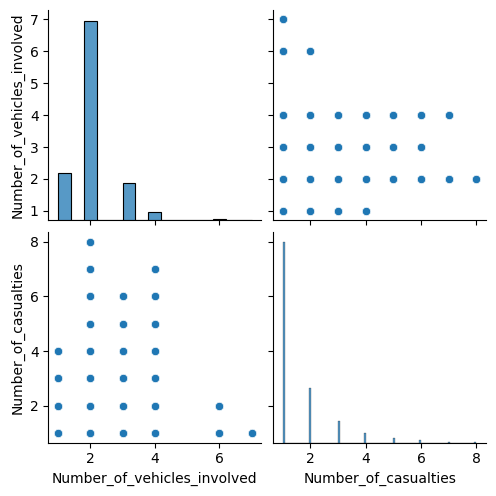

In [12]:
# pair plot

sns.pairplot(data)

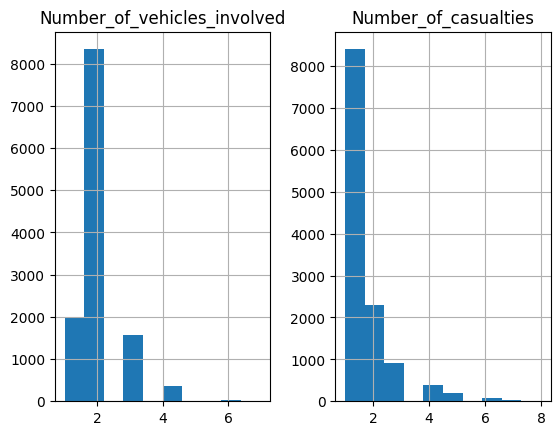

In [13]:
# Histogram
data.hist()
plt.show()

Observation

. Most accidents are occured when 2 vehicles are involved and 1 casuality is happend mostly in the accidents. 

Text(0.5, 1.0, 'Distribution of Accident severity')

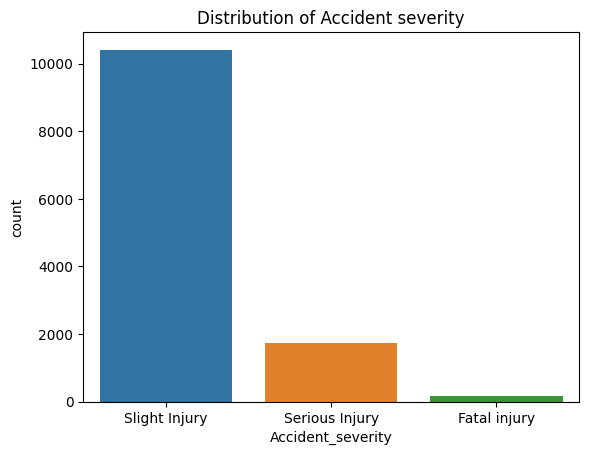

In [14]:
# plotting 

sns.countplot(x = data['Accident_severity'])
plt.title('Distribution of Accident severity')

In [15]:
print('Slight Injury:',data['Accident_severity'].value_counts()[0]/len(data['Accident_severity'])*100)
print('Serious Injury:',data['Accident_severity'].value_counts()[1]/len(data['Accident_severity'])*100)
print('Fatal injury:',data['Accident_severity'].value_counts()[2]/len(data['Accident_severity'])*100)

Slight Injury: 84.56479376420916
Serious Injury: 14.152322182526794
Fatal injury: 1.2828840532640466


# Educational level

<Axes: >

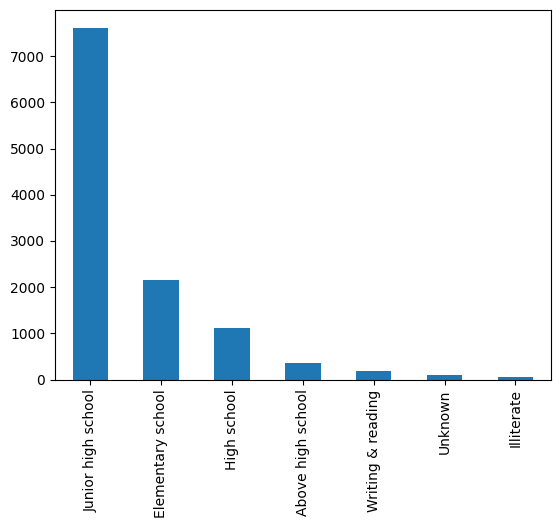

In [16]:
data['Educational_level'].value_counts().plot(kind='bar')

We can see more than 7000 drivers are having education up to junior high school, and only a fraction of drivers have education above high school.

# Association between the ‘road surface type’ column and target ‘accident severity’

<function matplotlib.pyplot.show(close=None, block=None)>

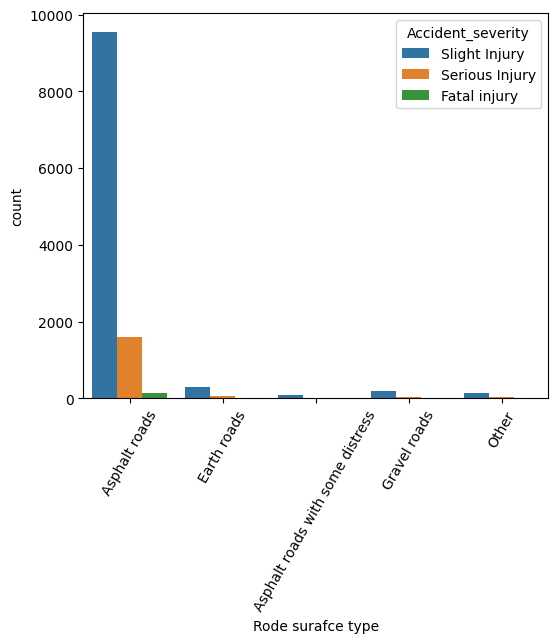

In [17]:
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=data)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

We can learn that most accidents happened on “asphalt roads” in our dataset, followed by “earth roads.” Here we can say that most fatal injuries occur on asphalt roads, so they might not be a significant variable to predict the target class

Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: Road_surface_conditions, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

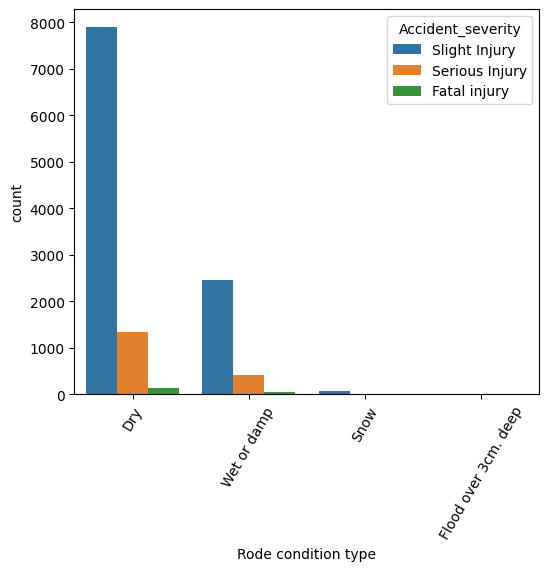

In [18]:
print(data['Road_surface_conditions'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_conditions', hue='Accident_severity', data=data)
plt.xlabel('Rode condition type')
plt.xticks(rotation=60)
plt.show

# How does road_surface affact injuries?

In [19]:
pivot_data = pd.pivot_table(data=data,index='Road_surface_conditions',columns='Accident_severity',aggfunc='count')
fatal_data = pivot_data['Road_surface_type']
fatal_data.fillna(0, inplace=True)
fatal_data['sum_of_injuries'] = fatal_data['Fatal injury'] + fatal_data['Serious Injury'] + fatal_data['Slight Injury']
fatal_data

Accident_severity,Fatal injury,Serious Injury,Slight Injury,sum_of_injuries
Road_surface_conditions,,,,
Dry,121.0,1312.0,7774.0,9207.0
Flood over 3cm. deep,0.0,0.0,2.0,2.0
Snow,0.0,4.0,65.0,69.0
Wet or damp,36.0,404.0,2426.0,2866.0


# plotting relationship between Number_of_casualties and Number_of_vehicles_involved

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

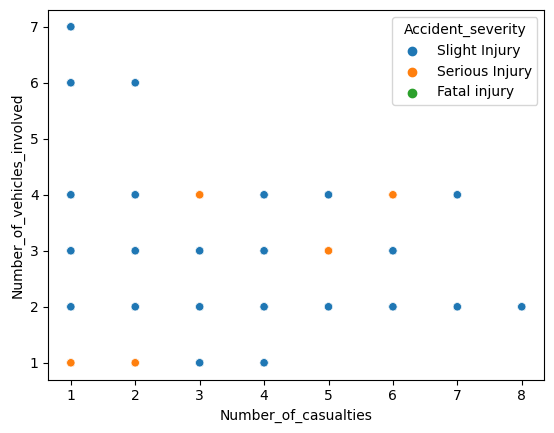

In [20]:
# Scatter plot
sns.scatterplot(x=data['Number_of_casualties'], y=data['Number_of_vehicles_involved'], hue=data['Accident_severity'])

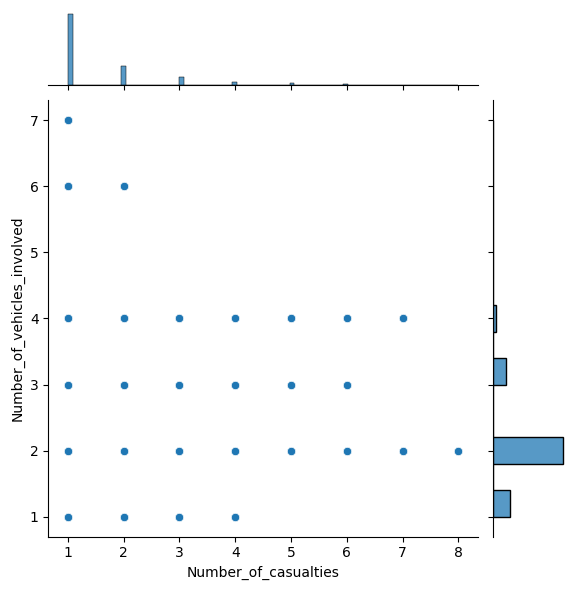

In [21]:
#joint Plot

sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=data)

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

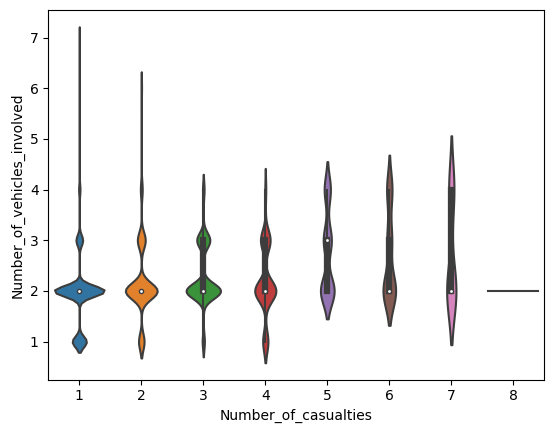

In [22]:
# violin plot

sns.violinplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=data)

<BarContainer object of 12316 artists>

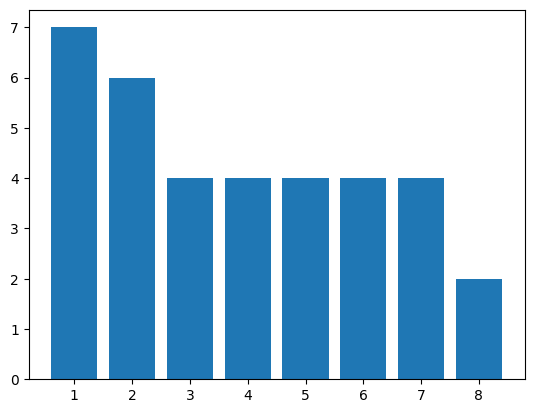

In [23]:
# bar graph
plt.bar(data['Number_of_casualties'],data['Number_of_vehicles_involved'])

<Axes: >

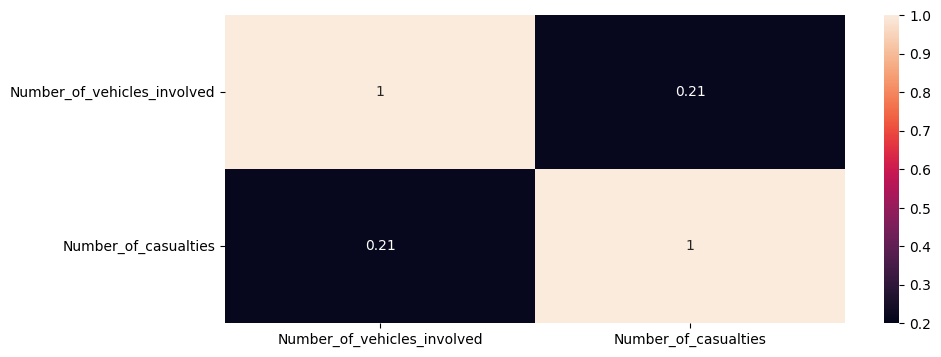

In [24]:
#plotting the correlation using heatmap

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=0.2,vmax=1)


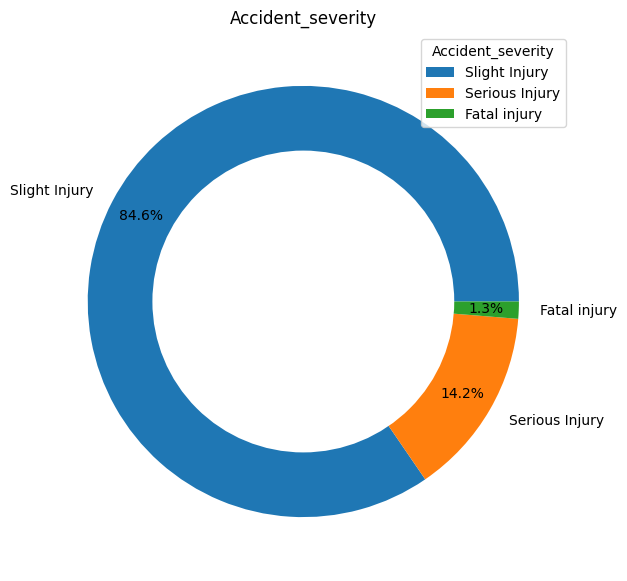

In [25]:
donutdf=pd.DataFrame(data['Accident_severity'].value_counts())

#plot donut chart of Accident_severity
AS=donutdf.index
numbers=donutdf.values.ravel()
explode=(0.05,0.05,0.05)
#plot the pie
fig=plt.figure(figsize=(7,7))
fig=plt.pie(numbers,labels=AS,autopct='%1.1f%%',pctdistance=0.85)
Centre_Circle=plt.Circle((0,0),0.7,fc='White')
fig=plt.gcf()
fig.gca().add_artist(Centre_Circle)
plt.title('Accident_severity')
plt.legend(title='Accident_severity')
plt.show()

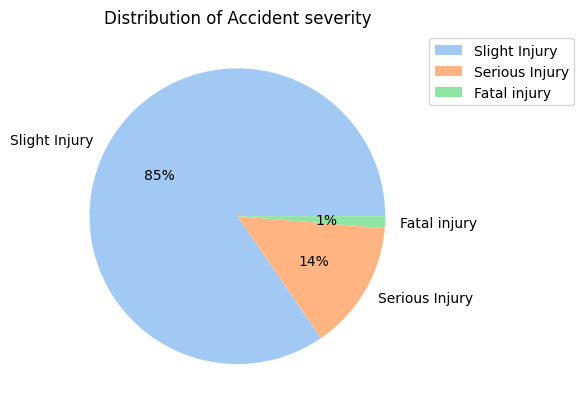

In [26]:
AS=data['Accident_severity'].value_counts()
data1=AS.values
labels=AS.index
colors=sns.color_palette('pastel')[0:8]
plt.pie(data1,labels=labels,colors=colors,autopct='%.0f%%')
plt.title('Distribution of Accident severity')
plt.legend(labels,loc='upper left',bbox_to_anchor=(1,1))
plt.show()


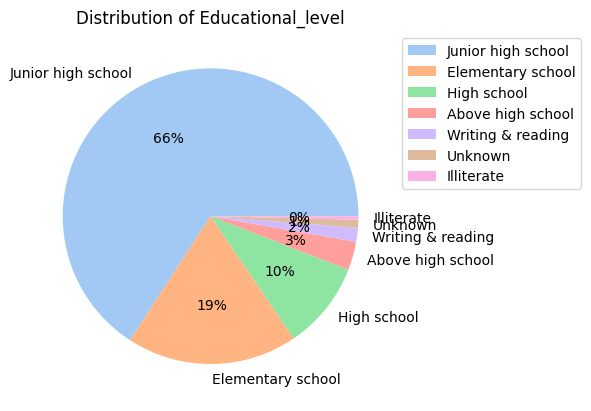

In [27]:
EL=data['Educational_level'].value_counts()
data1=EL.values
labels=EL.index
colors=sns.color_palette('pastel')[0:8]
plt.pie(data1,labels=labels,colors=colors,autopct='%.0f%%')
plt.title('Distribution of Educational_level')
plt.legend(labels,loc='upper left',bbox_to_anchor=(1,1))
plt.show()

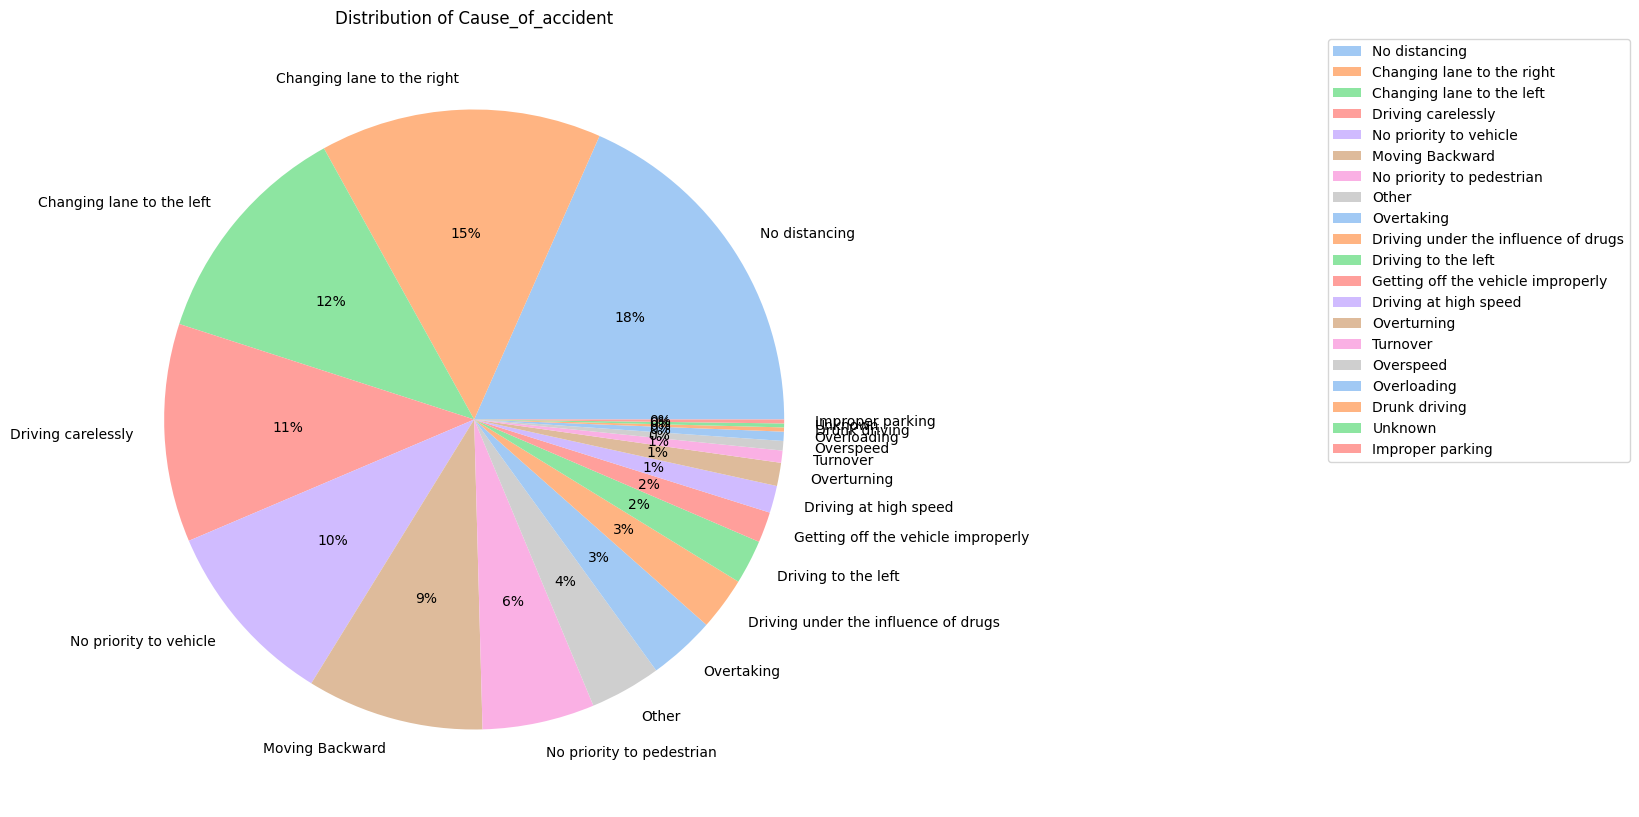

In [28]:
# Cause_of_accident
plt.figure(figsize=(10,20))
CA=data['Cause_of_accident'].value_counts()
data1=CA.values
labels=CA.index
colors=sns.color_palette('pastel')[0:8]
plt.pie(data1,labels=labels,colors=colors,autopct='%.0f%%')
plt.title('Distribution of Cause_of_accident')
plt.legend(labels,loc='best',bbox_to_anchor=(2,1))
plt.show()

In [29]:
#storing numerical column names to a variable
numerical=[i for i in data.columns if data[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Number_of_vehicles_involved', 'Number_of_casualties']


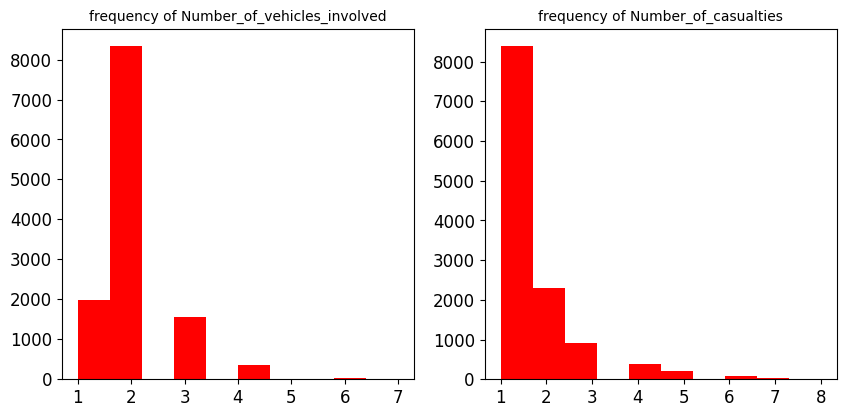

In [30]:
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= data.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(data[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1

In [31]:
#count plot for categorical columns

In [32]:
categorical= ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver','Educational_level', 'Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle','Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type','Road_surface_conditions', 'Light_conditions', 'Weather_conditions','Type_of_collision', 'Vehicle_movement', 'Casualty_class','Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity']

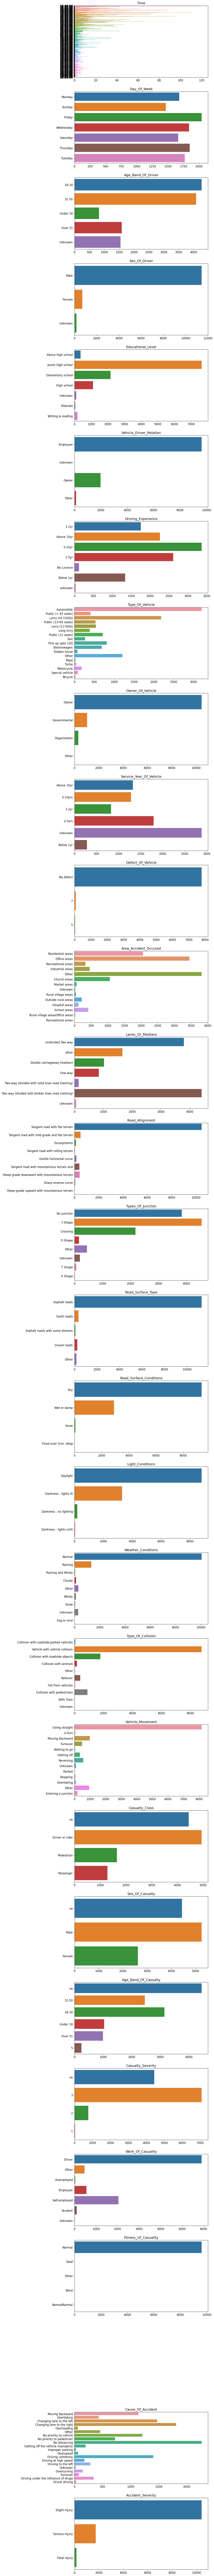

In [33]:
#count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1
for col in categorical:
    if plotnumber <= data.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(31,1,plotnumber)
        sns.countplot(data=data, y=col)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1


# Preprocessing

# Handling Missing values

In [34]:
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [35]:
#dropping columns which has more than 2000 missing values and lesser important columns
data.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time','Day_of_week','Educational_level','Type_of_vehicle','Owner_of_vehicle','Road_surface_type','Sex_of_driver','Sex_of_casualty'], axis = 1, inplace = True)
data.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,NaN,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,NaN,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Tangent road with flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [36]:
data

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,NaN,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,NaN,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Tangent road with flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Employee,2-5yr,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,Unknown,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,Over 51,Employee,5-10yr,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,18-30,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [37]:
data.isna().sum()

Age_band_of_driver               0
Vehicle_driver_relation        579
Driving_experience             829
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [38]:
for i in ['Vehicle_driver_relation','Driving_experience','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Type_of_collision','Vehicle_movement']:
    data[i]=data[i].fillna(data[i].mode)

In [39]:
data.isna().sum()

Age_band_of_driver             0
Vehicle_driver_relation        0
Driving_experience             0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [40]:
data.dtypes

Age_band_of_driver             object
Vehicle_driver_relation        object
Driving_experience             object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_accident              object
Accident_severity              object
dtype: object

# Handling Outliers

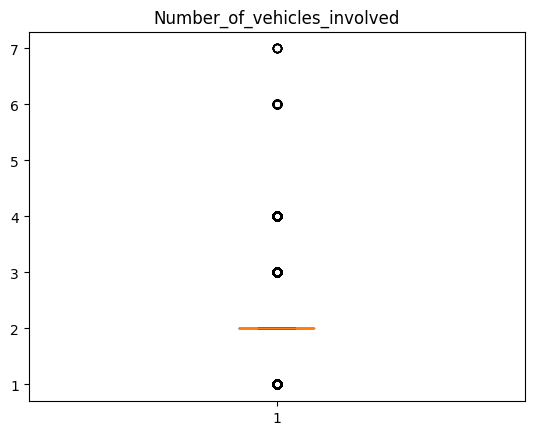

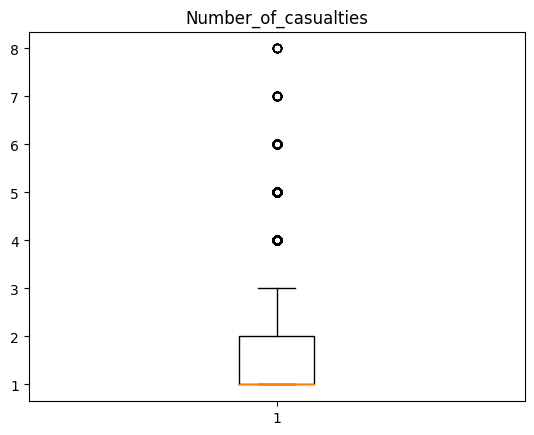

In [41]:
for i in['Number_of_vehicles_involved','Number_of_casualties']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [42]:
# capping

def iqr_capping(df,variables):
  
  q1=df[variables].quantile(0.25)
  q3=df[variables].quantile(0.75)
  iqr=q3-q1
  upper_whisker=q3+(1.5*iqr)
  lower_whisker=q1-(1.5*iqr)
  return lower_whisker,upper_whisker

In [43]:
lower_Number_of_vehicles_involved,upper_Number_of_vehicles_involved=iqr_capping(data,'Number_of_vehicles_involved')
print('lower Number_of_vehicles_involved = ',lower_Number_of_vehicles_involved)
print('upper Number_of_vehicles_involved = ',upper_Number_of_vehicles_involved)

lower Number_of_vehicles_involved =  2.0
upper Number_of_vehicles_involved =  2.0


In [44]:
data['Number_of_vehicles_involved']=np.where(data['Number_of_vehicles_involved']>upper_Number_of_vehicles_involved,upper_Number_of_vehicles_involved,
                    np.where(data['Number_of_vehicles_involved']<lower_Number_of_vehicles_involved,lower_Number_of_vehicles_involved,data['Number_of_vehicles_involved']))

In [45]:
lower_Number_of_casualties,upper_Number_of_casualties=iqr_capping(data,'Number_of_casualties')
print('lower Number_of_casualties = ',lower_Number_of_casualties)
print('upper Number_of_casualties = ',upper_Number_of_casualties)
data['Number_of_casualties']=np.where(data['Number_of_casualties']>upper_Number_of_casualties,upper_Number_of_casualties,
                    np.where(data['Number_of_casualties']<lower_Number_of_casualties,lower_Number_of_casualties,data['Number_of_casualties']))

lower Number_of_casualties =  -0.5
upper Number_of_casualties =  3.5


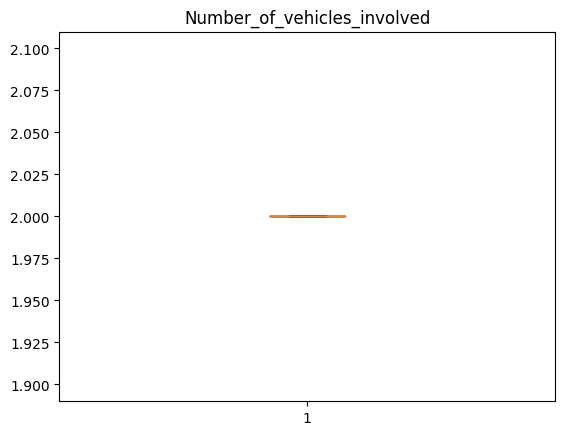

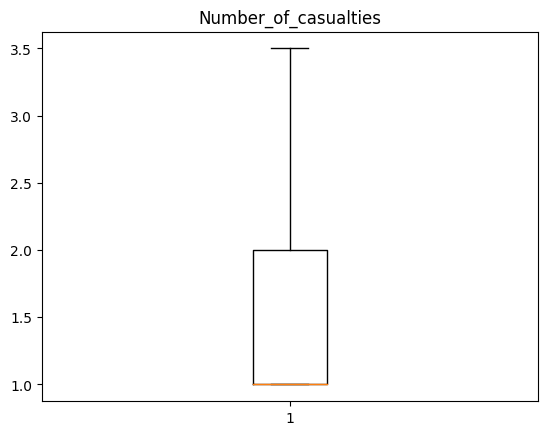

In [46]:
for i in ['Number_of_vehicles_involved','Number_of_casualties']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [47]:
data.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,<bound method Series.mode of 0 ...,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2.0,2.0,Going straight,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,<bound method Series.mode of 0 ...,No junction,Dry,Daylight,Normal,Collision with roadside objects,2.0,2.0,Going straight,Driver or rider,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,Pedestrian,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Tangent road with flat terrain,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2.0,2.0,Going straight,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


# Handling Categorical values

In [48]:
data.dtypes

Age_band_of_driver              object
Vehicle_driver_relation         object
Driving_experience              object
Area_accident_occured           object
Lanes_or_Medians                object
Road_allignment                 object
Types_of_Junction               object
Road_surface_conditions         object
Light_conditions                object
Weather_conditions              object
Type_of_collision               object
Number_of_vehicles_involved    float64
Number_of_casualties           float64
Vehicle_movement                object
Casualty_class                  object
Age_band_of_casualty            object
Casualty_severity               object
Pedestrian_movement             object
Cause_of_accident               object
Accident_severity               object
dtype: object

In [49]:
data.columns

Index(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')

In [50]:
newcategorical = data.select_dtypes(include=np.object).columns.tolist()
num_var=data.select_dtypes(include=np.int64).columns.tolist()

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for col in newcategorical:
  if data[col].dtype=='object':
    data[col]=label_encoder.fit_transform(data[col].astype(str))

In [52]:
data.dtypes

Age_band_of_driver               int64
Vehicle_driver_relation          int64
Driving_experience               int64
Area_accident_occured            int64
Lanes_or_Medians                 int64
Road_allignment                  int64
Types_of_Junction                int64
Road_surface_conditions          int64
Light_conditions                 int64
Weather_conditions               int64
Type_of_collision                int64
Number_of_vehicles_involved    float64
Number_of_casualties           float64
Vehicle_movement                 int64
Casualty_class                   int64
Age_band_of_casualty             int64
Casualty_severity                int64
Pedestrian_movement              int64
Cause_of_accident                int64
Accident_severity                int64
dtype: object

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age_band_of_driver           12316 non-null  int64  
 1   Vehicle_driver_relation      12316 non-null  int64  
 2   Driving_experience           12316 non-null  int64  
 3   Area_accident_occured        12316 non-null  int64  
 4   Lanes_or_Medians             12316 non-null  int64  
 5   Road_allignment              12316 non-null  int64  
 6   Types_of_Junction            12316 non-null  int64  
 7   Road_surface_conditions      12316 non-null  int64  
 8   Light_conditions             12316 non-null  int64  
 9   Weather_conditions           12316 non-null  int64  
 10  Type_of_collision            12316 non-null  int64  
 11  Number_of_vehicles_involved  12316 non-null  float64
 12  Number_of_casualties         12316 non-null  float64
 13  Vehicle_movement

In [54]:
data.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,10,0,6,2,0,3,2,4,2.0,2.0,3,3,5,3,5,9,2
1,1,1,4,7,5,6,2,0,3,2,9,2.0,2.0,3,3,5,3,5,16,2
2,0,1,0,1,7,0,2,0,3,2,3,2.0,2.0,3,0,1,2,5,0,1
3,0,1,2,7,7,7,8,0,0,2,9,2.0,2.0,3,2,0,2,5,1,2
4,0,1,1,4,7,6,8,0,0,2,9,2.0,2.0,3,3,5,3,5,16,2


In [55]:
x=data.drop('Accident_severity',axis=1)
y=data['Accident_severity']

# Over Sampling

In [56]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x1,y1=oversample.fit_resample(x,y)

In [57]:
#checking the oversampling output
y2=pd.DataFrame(y1)
y2.value_counts()


Accident_severity
0                    10415
1                    10415
2                    10415
dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

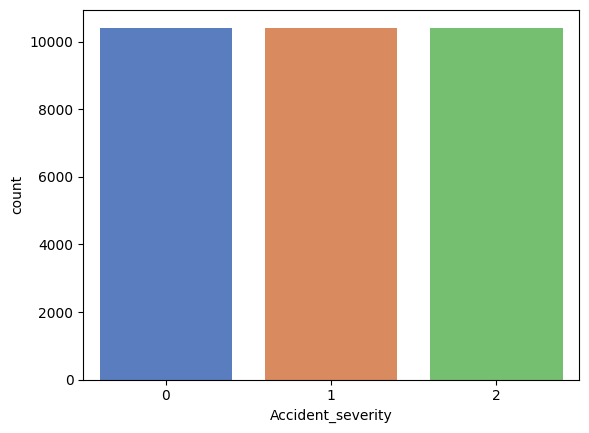

In [58]:
sns.countplot(x = y1, palette='muted')

In [59]:
#converting data to training data and testing data
from sklearn.model_selection import train_test_split
#splitting 80% of the data to training data and 20% of data to testing data
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=42)

In [60]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(24996, 19) (6249, 19) (24996,) (6249,)


STANDARD SCALING

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)
data

array([[-0.96671831, -0.36252728, -1.41320689, ...,  0.1834577 ,
         0.4084951 ,  0.41170928],
       [-0.2190354 , -0.36252728,  1.02763819, ...,  0.1834577 ,
         1.78062863,  0.41170928],
       [-0.96671831, -0.36252728, -1.41320689, ...,  0.1834577 ,
        -1.35567659, -2.05094806],
       ...,
       [ 0.52864752, -0.36252728, -0.19278435, ...,  0.1834577 ,
        -1.15965751, -2.05094806],
       [-0.96671831, -0.36252728,  1.02763819, ...,  0.1834577 ,
        -0.37558121,  0.41170928],
       [-0.96671831, -0.36252728, -0.19278435, ..., -4.29294664,
        -1.15965751,  0.41170928]])

In [62]:
data.shape

(12316, 20)

In [63]:
data=pd.DataFrame(data,columns=['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'])

In [64]:
data.describe()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
count,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,12316.0,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04,1.231600e+04
mean,-1.015391e-16,1.800011e-16,1.961550e-17,-4.442334e-17,5.769265e-17,2.772132e-16,2.769247e-17,-2.769247e-17,-8.653898e-17,-7.153889e-17,-1.286546e-16,0.0,6.461577e-17,-6.346192e-17,9.403903e-17,1.384624e-17,-3.000018e-16,4.846183e-17,5.956767e-17,2.307706e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,0.0,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-9.667183e-01,-1.626651e+00,-1.413207e+00,-2.708071e+00,-2.090700e+00,-5.315565e+00,-1.285228e+00,-5.633999e-01,-1.644466e+00,-2.107313e+00,-2.565345e+00,0.0,-6.109838e-01,-1.770498e+00,-1.092174e+00,-1.235712e+00,-3.903160e+00,-5.412048e+00,-1.355677e+00,-4.513605e+00
25%,-9.667183e-01,-3.625273e-01,-8.029956e-01,-8.197046e-02,-4.628327e-01,1.261455e-01,-6.520353e-01,-5.633999e-01,-1.644466e+00,-3.620593e-01,-8.063657e-01,0.0,-6.109838e-01,-3.688790e-01,-1.092174e+00,-1.235712e+00,-5.001217e-01,1.834577e-01,-1.159658e+00,4.117093e-01
50%,-2.190354e-01,-3.625273e-01,-1.927843e-01,2.931868e-01,-4.628327e-01,1.261455e-01,-6.520353e-01,-5.633999e-01,6.211665e-01,-3.620593e-01,6.008181e-01,0.0,-6.109838e-01,-3.688790e-01,-3.410034e-01,1.786960e-01,-5.001217e-01,1.834577e-01,4.084951e-01,4.117093e-01
75%,5.286475e-01,-3.625273e-01,1.027638e+00,2.931868e-01,6.224119e-01,1.261455e-01,1.247543e+00,-5.633999e-01,6.211665e-01,-3.620593e-01,6.008181e-01,0.0,6.626920e-01,9.832728e-02,1.161339e+00,1.121635e+00,1.201397e+00,1.834577e-01,8.005332e-01,4.117093e-01
max,2.024013e+00,3.429845e+00,2.858272e+00,2.544130e+00,1.707657e+00,2.847001e+00,1.247543e+00,1.787684e+00,6.211665e-01,4.873701e+00,9.526141e-01,0.0,2.573206e+00,4.303184e+00,1.161339e+00,1.121635e+00,1.201397e+00,3.540761e+00,2.368686e+00,4.117093e-01


# MODELS

# LOGISTIC REGRESSION

In [65]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(random_state=42)
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [66]:
y_pred

array([2, 2, 1, ..., 2, 0, 1])

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.5316050568090894
precision is 0.5277968182651455
Recall is 0.5317075840988338
f1 score is 0.5291893993547486


In [68]:
print('Accuracy is',accuracy_score(y_test,y_pred))
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix

Accuracy is 0.5316050568090894


array([[1383,  435,  267],
       [ 444,  918,  738],
       [ 438,  605, 1021]])

In [69]:
accuracy_log=accuracy_score(y_test,y_pred)
print(accuracy_log)

0.5316050568090894


In [70]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1383,  435,  267],
       [ 444,  918,  738],
       [ 438,  605, 1021]])

<function matplotlib.pyplot.show(close=None, block=None)>

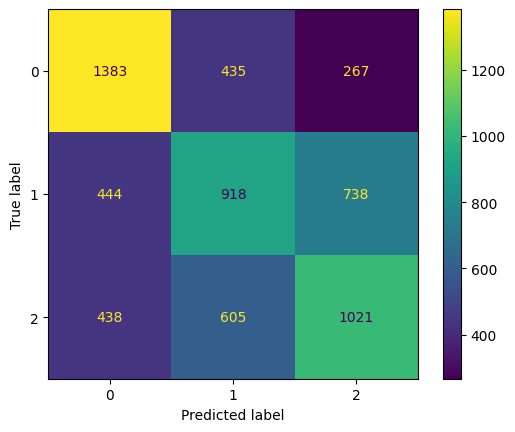

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show

# KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [73]:
metric_k

[0.8545367258761402,
 0.8110097615618499,
 0.833733397343575,
 0.8054088654184669,
 0.8191710673707793,
 0.7953272523603777,
 0.7996479436709873,
 0.7836453832613218,
 0.791486637862058,
 0.7730836933909425,
 0.7796447431589054,
 0.7638022083533366]

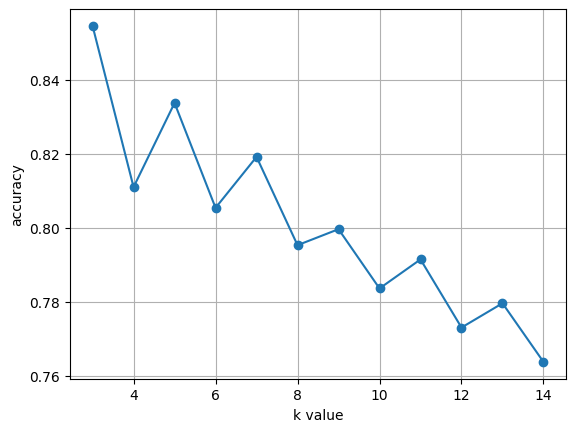

In [74]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [75]:
classifier=KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.8217314770363258
precision is 0.8684494156602115
Recall is 0.8201573691213143
f1 score is 0.8040623077522167


In [77]:
print('Accuracy is',accuracy_score(y_test,y_pred))
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix

Accuracy is 0.8217314770363258


array([[2083,    2,    0],
       [  17, 2077,    6],
       [ 164,  925,  975]])

In [78]:
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)

0.8217314770363258


In [79]:
print('Accuracy of kNN classification is',accuracy_score(y_test,y_pred))
print('Precision of kNN classification is',precision_score(y_test,y_pred,average='macro'))

Accuracy of kNN classification is 0.8217314770363258
Precision of kNN classification is 0.8684494156602115


<function matplotlib.pyplot.show(close=None, block=None)>

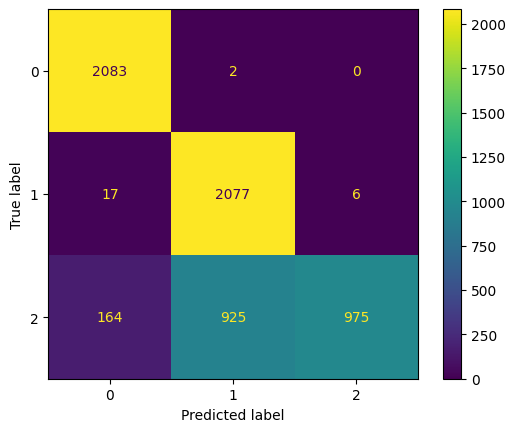

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(c_matrix)
disp.plot()
plt.show

# DECISION TREE

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [82]:
y_pred

array([1, 2, 2, ..., 0, 0, 1])

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.8489358297327573
precision is 0.8471952081941705
Recall is 0.8488002753943026
f1 score is 0.8476964142043427


In [84]:
matrix_dec=confusion_matrix(y_test,y_pred)
print(matrix_dec)

[[2047   23   15]
 [  73 1669  358]
 [  50  425 1589]]


In [85]:
accuracy_dec=accuracy_score(y_test,y_pred)
print(accuracy_dec)

0.8489358297327573


# SVM

In [86]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [87]:
y_pred=svmclf.predict(x_test)
y_pred

array([1, 2, 2, ..., 0, 0, 2])

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.6993118899023844
precision is 0.6922300762336885
Recall is 0.6988913918698928
f1 score is 0.6904455806577684


In [89]:
accuracy_svm=accuracy_score(y_test,y_pred)
print(accuracy_svm)

0.6993118899023844


In [90]:
print(confusion_matrix(y_test,y_pred))

[[1949  101   35]
 [ 265 1332  503]
 [ 283  692 1089]]


<function matplotlib.pyplot.show(close=None, block=None)>

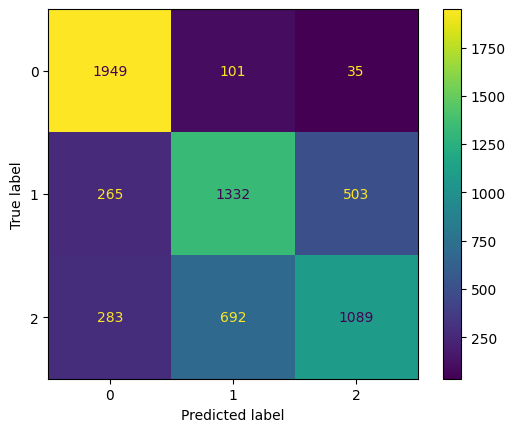

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show

# RANDOM FOREST

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred=rf_clf.predict(x_test)
y_pred

array([1, 2, 2, ..., 0, 0, 2])

In [94]:
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.9299087854056649


In [95]:
accuracy_ran=accuracy_score(y_test,y_pred)
print(accuracy_ran)

0.9299087854056649


In [96]:
print(confusion_matrix(y_test,y_pred))

[[2077    2    6]
 [  19 1810  271]
 [  11  129 1924]]


<function matplotlib.pyplot.show(close=None, block=None)>

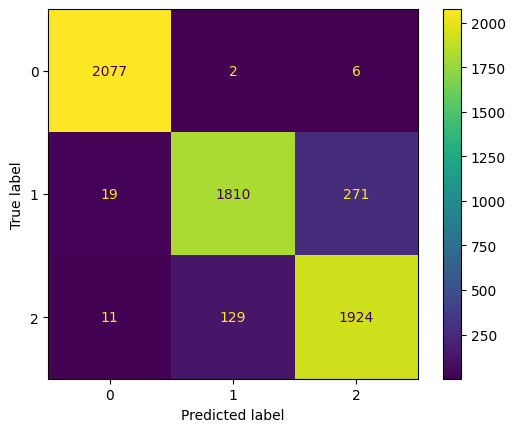

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show

In [98]:
# hyper parameter tuning

In [99]:
rf_clf=RandomForestClassifier(n_estimators=110,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=110)

In [100]:
y_pred=rf_clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 2])

In [101]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy is : 0.562009921587454
[[1811  134  140]
 [ 855  172 1073]
 [ 510   25 1529]]


# Naive Bayes

In [104]:
#naive bayes model alg
from sklearn.naive_bayes import GaussianNB
model_naive=GaussianNB()
model_naive.fit(x_train,y_train)

GaussianNB()

In [105]:
y_pred=model_naive.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 2])

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is',accuracy_score(y_test,y_pred))
print('precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='macro'))
print('f1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.5252040326452232
precision is 0.52300269264919
Recall is 0.525271842326803
f1 score is 0.5121414390566813


In [107]:
accuracy_naive=accuracy_score(y_test,y_pred)
print(accuracy_naive)

0.5252040326452232


In [108]:
print(confusion_matrix(y_test,y_pred))

[[1603  281  201]
 [ 783  780  537]
 [ 627  538  899]]


<function matplotlib.pyplot.show(close=None, block=None)>

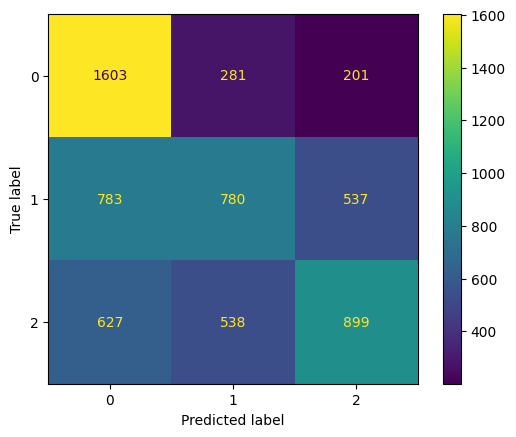

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show

# Comparing Accuracy of diffrent models

In [110]:
alg=['KNN','LogisticRegression','SVM','Decision Tree','Random Forest','Naive Bayes']
acc=[accuracy_KNN,accuracy_log,accuracy_svm,accuracy_dec,accuracy_ran,accuracy_naive]
Accuracy_Scores=pd.DataFrame({'Algorithms':alg, 'Accuracy': acc})
Accuracy_Scores['Accuracy']=Accuracy_Scores['Accuracy']*100
Accuracy_Scores

,Algorithms,Accuracy
0,KNN,82.173148
1,LogisticRegression,53.160506
2,SVM,69.931189
3,Decision Tree,84.893583
4,Random Forest,92.990879
5,Naive Bayes,52.520403


In [111]:
#sorting models based on their accuracy score
Accuracy_Scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy
4,Random Forest,92.990879
3,Decision Tree,84.893583
0,KNN,82.173148
2,SVM,69.931189
1,LogisticRegression,53.160506
5,Naive Bayes,52.520403


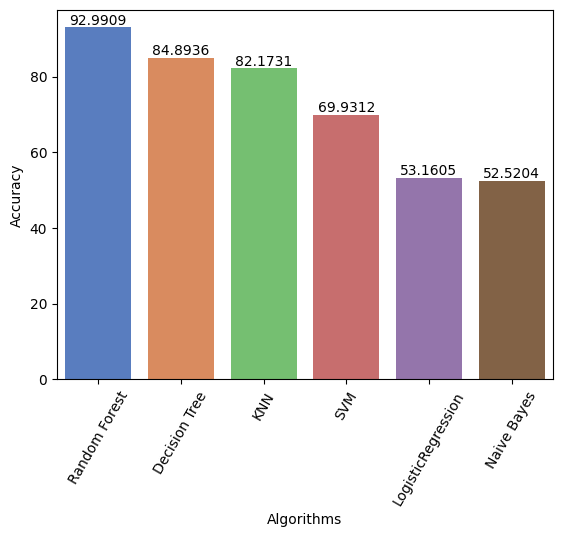

In [112]:
ax= sns.barplot(x='Algorithms', y='Accuracy',palette='muted', data=Accuracy_Scores.sort_values(by='Accuracy',ascending=False),errwidth=1)
for i in ax.containers:
    ax.bar_label(i,)
    plt.xticks(rotation=60)

# Observations
Random Forest algorithm gave highest accuracy score for this data set.
Except SVM, Naive Bayes and logisticRegression , all the other algorithms gave above 80% accuracy